In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2 as ResNet # Resnet50v2 is computationally more efficient and stable than Resnet
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import Precision, Recall, AUC
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)


2.10.0


In [3]:
# tf.compat.v1.enable_eager_execution()

!pip install pillow

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
# tf.compat.v1.disable_eager_execution()
# sess = tf.compat.v1.Session()
# session = tf.compact.v1.Session()

In [1]:
# import matplotlib.pyplot as plt
# def plot_graph(result):
#     # Models Loss graph
#     plt.plot(result.history['loss'], label='Training Loss')
#     plt.plot(result.history['val_loss'], label='validation Loss')
#     plt.title('Training and Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()

#     # Models accuracy graph
#     plt.plot(result.history['accuracy'], label='Training Accuracy')
#     plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Training and Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.show()
# plot_graph(result)

In [ ]:
### Second Variation

In [2]:
from comet_ml import Experiment
experiment = Experiment(
  api_key="1NimIMBLd1mQGehG9RAKHQd4X",
  project_name="image-emotion-classifier",
  workspace="nikhil527",
  auto_metric_logging=True,
  auto_param_logging=True,
  auto_histogram_weight_logging=True,
  auto_histogram_gradient_logging=True,
  auto_histogram_activation_logging=True,
  auto_histogram_epoch_rate=True
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorboard, keras, tensorflow.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'C:\\Users\\saini' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information
COMET INFO: Experiment is live on comet.com https://www.comet.com/nikhil527/image-emotion-classifier/0480c3d84d044033a032a9f3a5cdb99c



In [12]:
# training_data_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
# validation_data_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# validation_data = validation_data_generator.flow_from_directory(
#     "c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/train",
#     target_size=(48, 48),
#     batch_size = 64,
#     class_mode = 'categorical'
# )
# know how much time the model is taking to train and time per epoch as well

Found 28709 images belonging to 7 classes.


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

train_dataset  = train_datagen.flow_from_directory(directory = 'c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/train',
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

valid_dataset = valid_datagen.flow_from_directory(directory = 'c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/train',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

test_dataset = test_datagen.flow_from_directory(directory = 'c:/users/saini/onedrive/documents/masters/first semester/machine learning/datasets/fer2013/test',
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
base_model_1 = ResNet(include_top=False, weights='imagenet', input_shape=(48, 48, 3))

x = base_model_1.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(7, activation='softmax')(x)
model_1 = Model(inputs=base_model_1.input, outputs=predictions)

for layer in base_model_1.layers:
    layer.trainable = False

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_1.compile(optimizer=Adam(learning_rate=0.001), run_eagerly=True, loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')])

In [5]:
with tf.device('/GPU:0'):
    result_2 = model_1.fit(train_dataset, epochs=60, validation_data=valid_dataset, callbacks=[early_stopping])

Epoch 1/60
359/359 [==============================] - 332s 909ms/step - loss: 1.8425 - accuracy: 0.3146 - precision: 0.4275 - recall: 0.0832 - auc: 0.7032 - val_loss: 1.6108 - val_accuracy: 0.3775 - val_precision: 0.6420 - val_recall: 0.0800 - val_auc: 0.7609
Epoch 2/60
359/359 [==============================] - 266s 739ms/step - loss: 1.6109 - accuracy: 0.3723 - precision: 0.5932 - recall: 0.1123 - auc: 0.7602 - val_loss: 1.5858 - val_accuracy: 0.3769 - val_precision: 0.5978 - val_recall: 0.1251 - val_auc: 0.7697
Epoch 3/60
359/359 [==============================] - 269s 749ms/step - loss: 1.5491 - accuracy: 0.4019 - precision: 0.6198 - recall: 0.1482 - auc: 0.7819 - val_loss: 1.5829 - val_accuracy: 0.3860 - val_precision: 0.6105 - val_recall: 0.1237 - val_auc: 0.7701
Epoch 4/60
359/359 [==============================] - 281s 784ms/step - loss: 1.5044 - accuracy: 0.4230 - precision: 0.6488 - recall: 0.1759 - auc: 0.7963 - val_loss: 1.5673 - val_accuracy: 0.3917 - val_precision: 0.6409

In [6]:
result_2.history

{'loss': [1.842544674873352,
  1.6109148263931274,
  1.5490833520889282,
  1.5044360160827637,
  1.4505703449249268,
  1.4094631671905518,
  1.3661220073699951,
  1.33054518699646,
  1.289231300354004],
 'accuracy': [0.31461164355278015,
  0.3723005950450897,
  0.4019069969654083,
  0.4230233430862427,
  0.4431382715702057,
  0.4612068831920624,
  0.4831504821777344,
  0.4961685836315155,
  0.5151950716972351],
 'precision': [0.4274536073207855,
  0.5932398438453674,
  0.6198106408119202,
  0.6488439440727234,
  0.6714552640914917,
  0.6836654543876648,
  0.6952850222587585,
  0.7079883813858032,
  0.7294396758079529],
 'recall': [0.08324625343084335,
  0.11233019828796387,
  0.1482062041759491,
  0.17594043910503387,
  0.20350052416324615,
  0.22705502808094025,
  0.25809821486473083,
  0.27551376819610596,
  0.3077760338783264],
 'auc': [0.7032438516616821,
  0.7602010369300842,
  0.7819014191627502,
  0.7963150143623352,
  0.8123502731323242,
  0.8241921663284302,
  0.83627277612686

In [16]:
# plot_graph(result_2)

In [9]:
model_1.save('resnet_v1.h5')

In [7]:
model_1 = load_model('resnet_v1.h5')

In [10]:
images, labels = next(test_dataset)

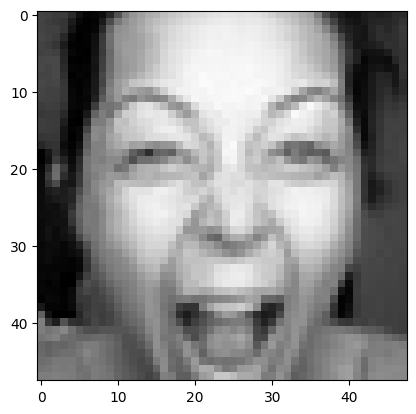

In [11]:
import matplotlib.pyplot as plt
plt.imshow(images[4])

In [12]:
labels[4]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
class_indexes = train_dataset.class_indices
class_indexes

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [14]:
images[0].shape

(48, 48, 3)

In [15]:
image_0 = images[9].reshape((1, 48, 48, 3))
image_0.shape

(1, 48, 48, 3)

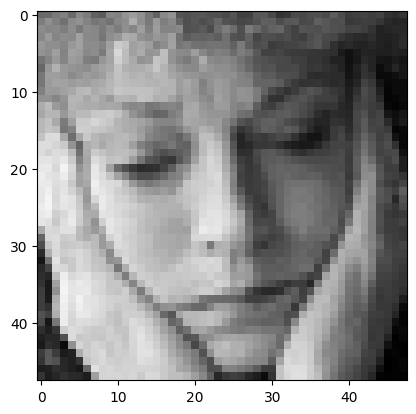

In [16]:
plt.imshow(images[9])

In [17]:
def compute_label(label_array, class_indexes):
    predicted_class_index = np.argmax(label_array)
    predicted_class = list(class_indexes.keys())[predicted_class_index]
    return predicted_class

1/1 [==============================] - 0s 83ms/step


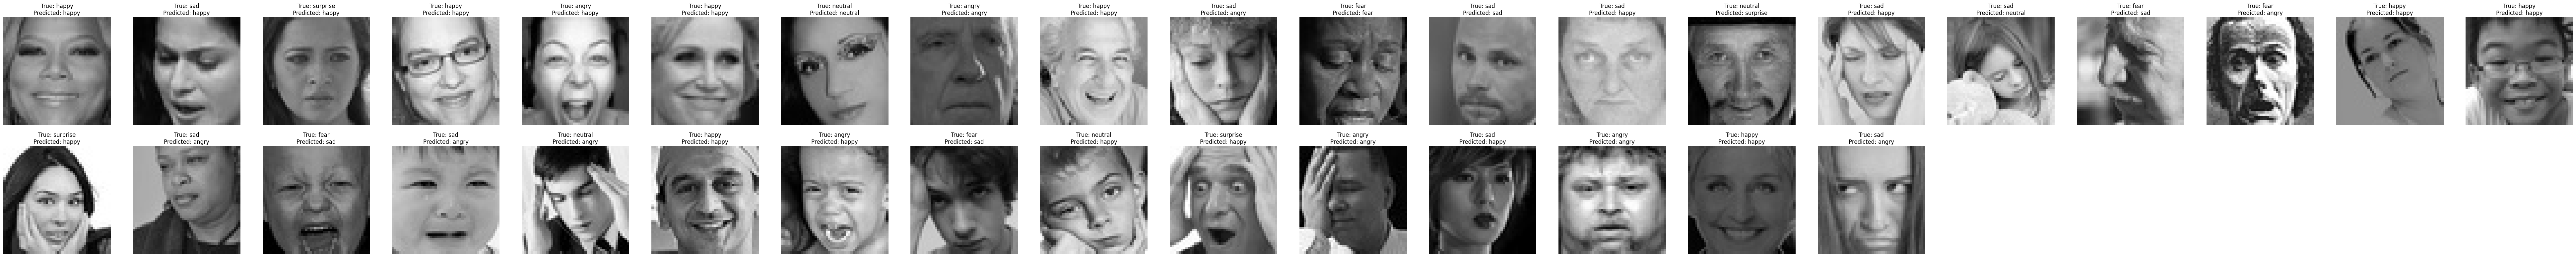

In [18]:
plt.figure(figsize=(100, 100))
for i in range(35):
    plt.subplot(20,20,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    # predicted_class_index = np.argmax(model_1.predict(images[i]))
    # predicted_class = list(class_indexes.keys())[predicted_class_index]
    # np.argmax(labels[i])
    true_label = compute_label(labels[i], class_indexes)
    predicted_label = compute_label(model_1.predict(images[i].reshape((1, 48, 48, 3))), class_indexes)
    # predicted_label = compute_label(model_1, labels[i], class_indexes)
    title = f"True: {true_label}\nPredicted: {predicted_label}"
    plt.title(title)

In [70]:
predicted_class_index = np.argmax(model_1.predict(image_0))
predicted_class = list(class_indexes.keys())[predicted_class_index]
print(predicted_class)

1/1 [==============================] - 0s 184ms/step
surprise


In [61]:
labels[8]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
experiment.end()

In [1]:
import tensorflow

In [3]:
tf.test.is_gpu_available()

<IPython.core.display.Javascript object>

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [11]:
tf.config.list_physical_devices("GPU")

<IPython.core.display.Javascript object>

[]

In [10]:
tf.test.is_built_with_cuda()

<IPython.core.display.Javascript object>

True

In [9]:
import torch
torch.cuda.is_available()

False

In [8]:
tensorflow.__version__

'2.3.1'